## Problem Statement :
## 5.	Develop a python program to implement Self organising Map and evaluate its performance on Credit card fraud detection dataset.

Libraies Required

In [32]:
import pandas as pd 
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt

Data Set : Credit Card Fraud detection 


Data Preprocessing

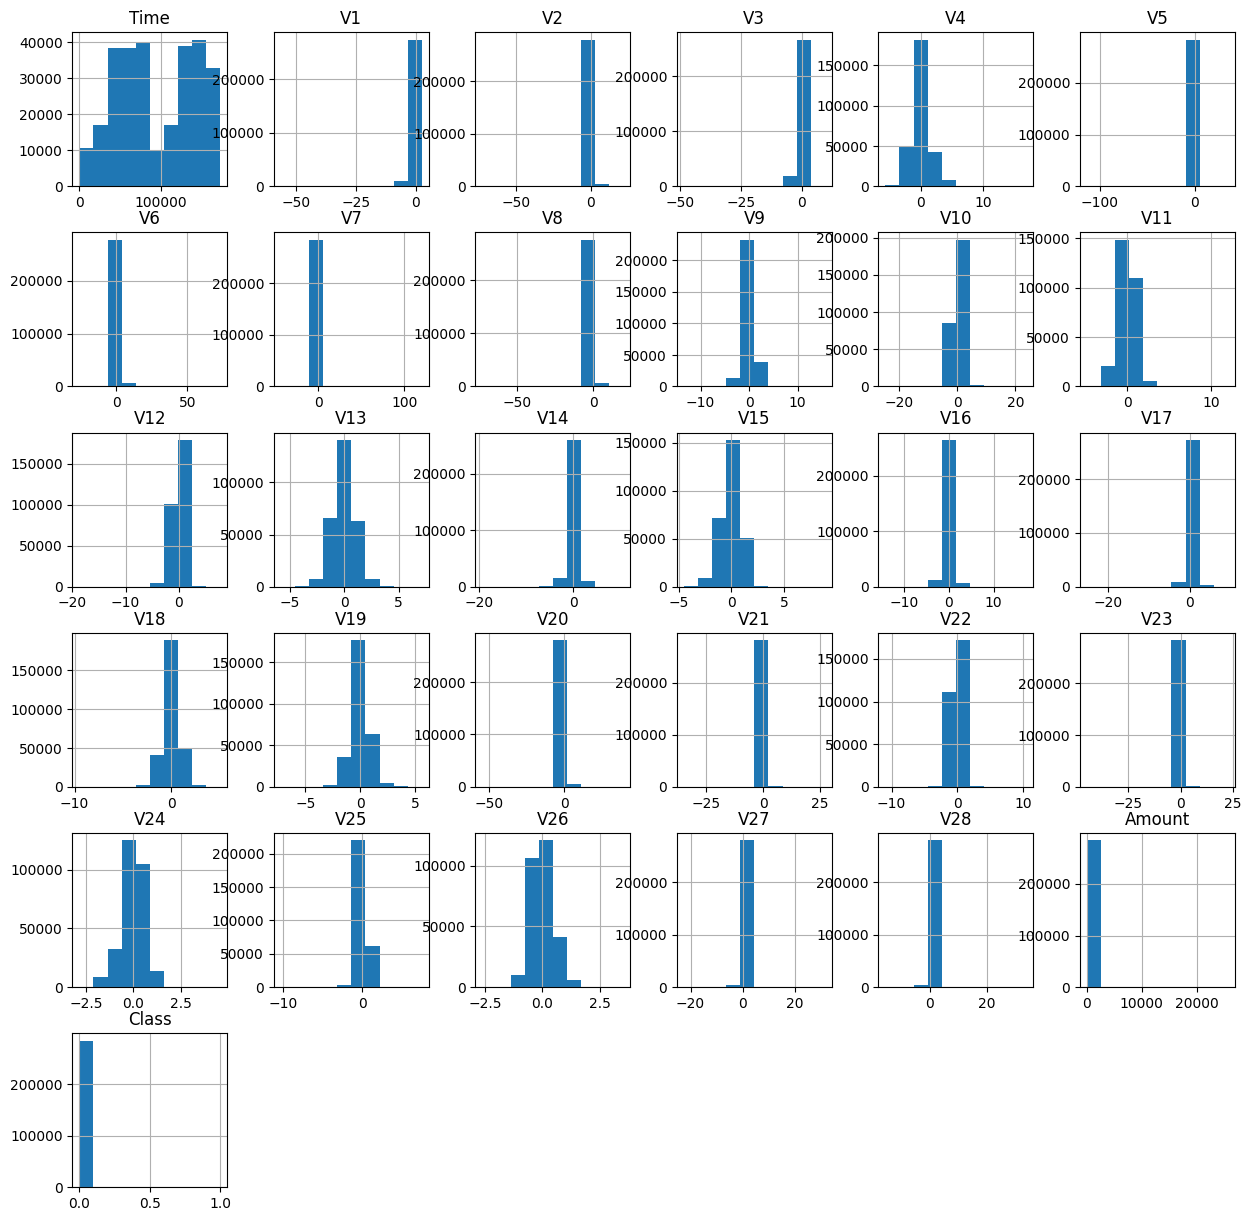

In [5]:
Dataset = '../Data/Credit-card/creditcard.csv'

df = pd.read_csv(Dataset)
df.hist(figsize=(15,15))
plt.show()



In [45]:
features = df.drop(['Time',"Class"],axis=1).values
target = df["Class"]
scaller = MinMaxScaler(feature_range = (0, 1))
features_scaled = scaller.fit_transform(features)






Neural Network Design 

In [37]:
# Set SOM parameters (adjust as needed)
som_size = (10, 10)  # Grid size of the SOM
input_len = features.shape[1]  # Number of features

# Initialize the SOM
som = MiniSom(som_size[0], som_size[1], input_len, sigma=0.3, learning_rate=0.5)
# Initializing the weights
som.random_weights_init(features_scaled)

# Train the SOM
som.train_random(features_scaled, 1000)  # You can adjust the number of iterations
som.distance_map()


array([[0.25389864, 0.44159768, 0.40058758, 0.3642812 , 0.41921396,
        0.52661555, 0.47158955, 0.35684431, 0.4036866 , 0.2803172 ],
       [0.57401533, 0.65158509, 0.63674049, 0.7715543 , 0.56335874,
        0.61384831, 0.74640725, 0.63897645, 0.78230651, 0.39957731],
       [0.43823074, 0.73387795, 0.68359968, 0.68904148, 0.53017229,
        0.48523609, 0.50720458, 0.62693488, 0.71055157, 0.37683048],
       [0.36237965, 0.68288491, 0.73697419, 0.52280562, 0.65034405,
        0.62260443, 0.5644616 , 0.54772077, 0.60994927, 0.4243375 ],
       [0.43730849, 0.58219825, 0.74513734, 0.60418455, 0.62005312,
        0.66395553, 0.48638038, 0.62152932, 0.82008892, 0.34817824],
       [0.48153932, 0.96091107, 0.63993647, 0.87717708, 0.58107819,
        0.54113636, 0.47042422, 0.54520676, 0.57978129, 0.35995131],
       [0.50794629, 0.7722811 , 0.86333772, 0.67897219, 1.        ,
        0.52287514, 0.5708169 , 0.47664165, 0.66678014, 0.40896583],
       [0.46493318, 0.64379948, 0.8365078

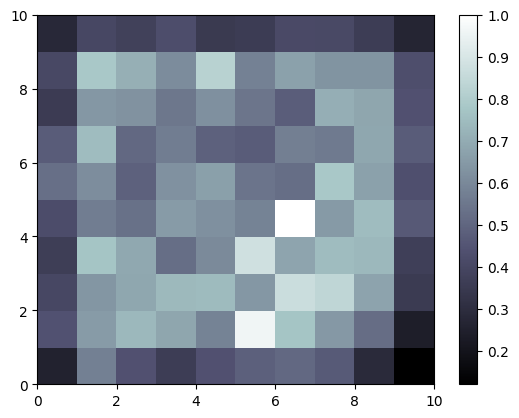

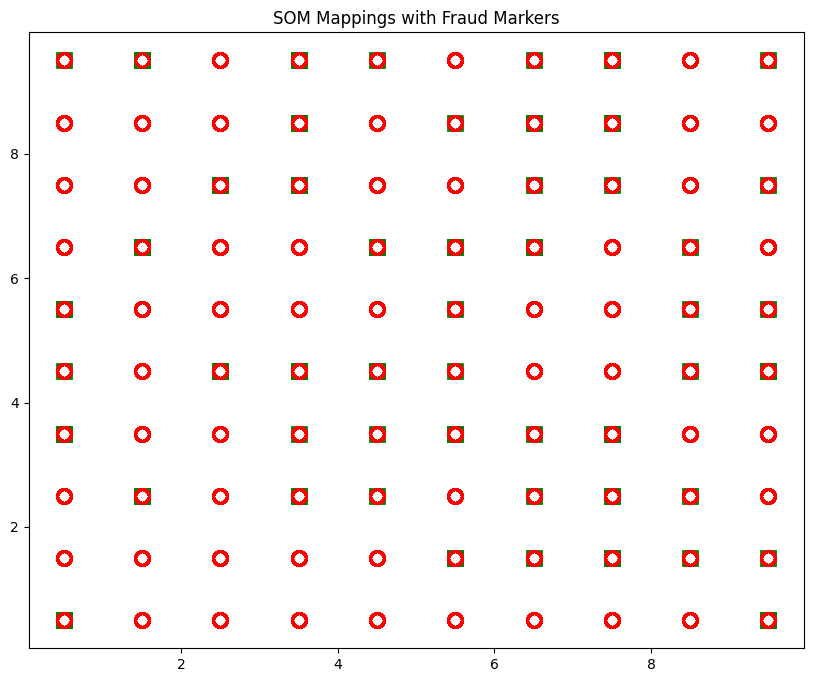

In [49]:
plt.bone()
plt.pcolor(som.distance_map().T)
plt.colorbar() #gives legend
# Plot the markers for fraud and non-fraud observations
markers = ['o', 's']
colors = ['r', 'g']

plt.figure(figsize=(10, 8))

# Plot the markers for fraud and non-fraud observations
for x, t in zip(features_scaled, target):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, markers[t], markeredgecolor=colors[t],
             markerfacecolor='None', markersize=10, markeredgewidth=2)

plt.title('SOM Mappings with Fraud Markers')
plt.show()

Metrics 

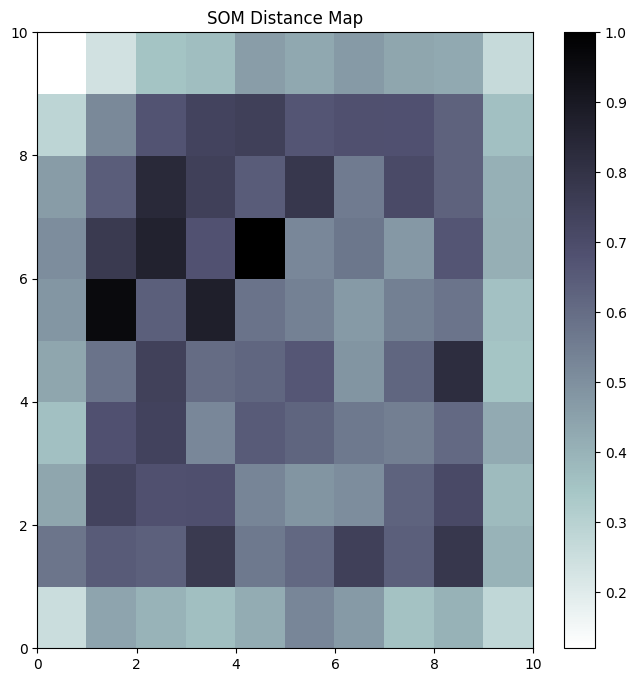

In [48]:
# Get the distance map
distance_map = som.distance_map()

# Visualize the distance map
plt.figure(figsize=(8, 8))
plt.pcolor(distance_map, cmap='bone_r')  # You can choose a different colormap if you prefer
plt.colorbar()

plt.title('SOM Distance Map')
plt.show()